In [2]:
######### Import the package #########
######################
#   YOUR CODE HERE   #
######################
import numpy as np
import matplotlib.pyplot as plt

######### Preprocess the data #########
######################
#   YOUR CODE HERE   #
######################
faces = np.load("Q2_data.npy")
print(faces.shape)

(400, 64, 64)


(-0.5, 63.5, 63.5, -0.5)

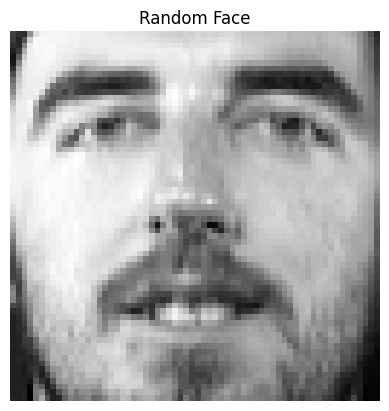

In [3]:
######### Display a random face (2 pts) #########
######################
#   YOUR CODE HERE   #
######################
random_face = faces[np.random.randint(0, faces.shape[0])]

plt.imshow(random_face, cmap="gray")
plt.title(f"Random Face")
plt.axis("off")

(-0.5, 63.5, 63.5, -0.5)

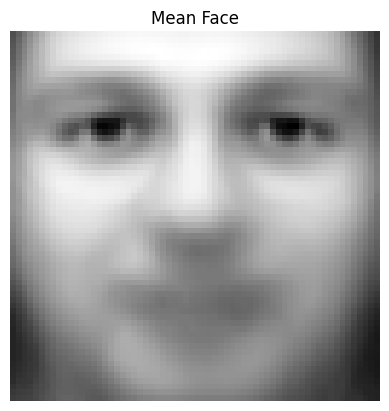

In [4]:
######### Compute and display mean face (2 pts) #########
######################
#   YOUR CODE HERE   #
######################
mean_face = np.mean(faces, axis = 0)

plt.imshow(mean_face, cmap="gray")
plt.title(f"Mean Face")
plt.axis("off")

In [19]:
######### Centralize the faces by subtracting the mean face (2 pts) #########
######################
#   YOUR CODE HERE   #
######################
norm_face = faces - mean_face
norm_face.shape


(400, 64, 64)

In [20]:
######### Calculate the eigenvalues and eigenvectors of the covariance matrix (3 pts) #########
######################
#   YOUR CODE HERE   #
######################
norm_face = norm_face.reshape(norm_face.shape[0], -1)
cov = norm_face.T @ norm_face
# eigenvalues, eigenvectors = np.linalg.eigh(cov)
eigenvalues, eigenvectors = np.linalg.eig(cov)

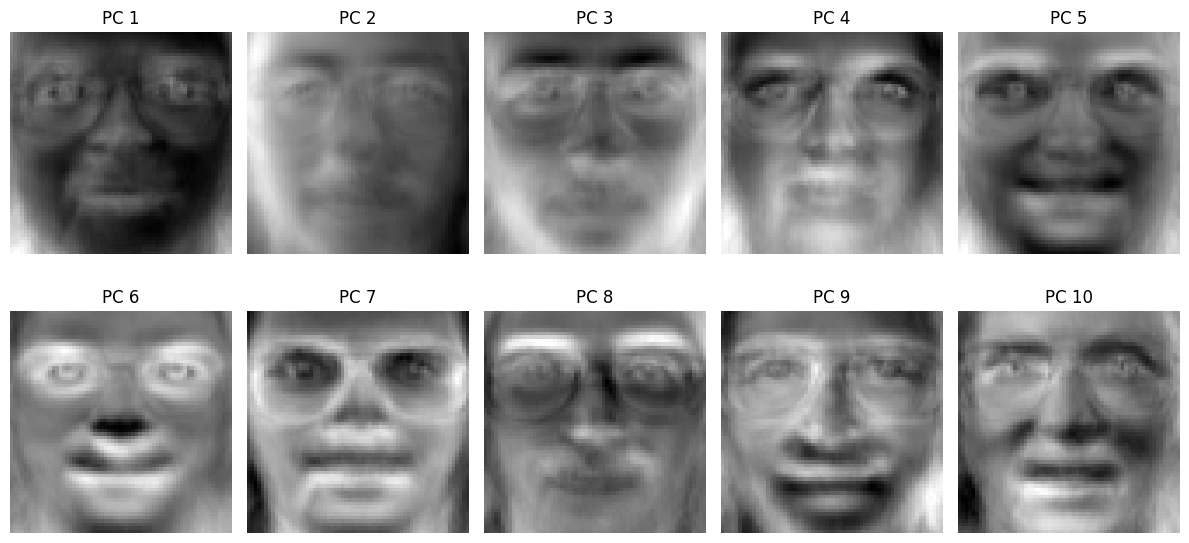

In [23]:
######### Display first 10 eigenfaces (3 pts) #########
######################
#   YOUR CODE HERE   #
######################
sorted_indices = np.argsort(eigenvalues)[::-1]

top_10_indices = sorted_indices[:10]
top_10_eigenvalues = eigenvalues[top_10_indices] 
top_10_eigenvectors = eigenvectors[:, top_10_indices]

top_10_eigenvectors_img = top_10_eigenvectors.T.reshape(10, 64, 64)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(top_10_eigenvectors_img[i], cmap="gray")
    ax.set_title(f"PC {i+1}")
    ax.axis("off") 

plt.tight_layout()


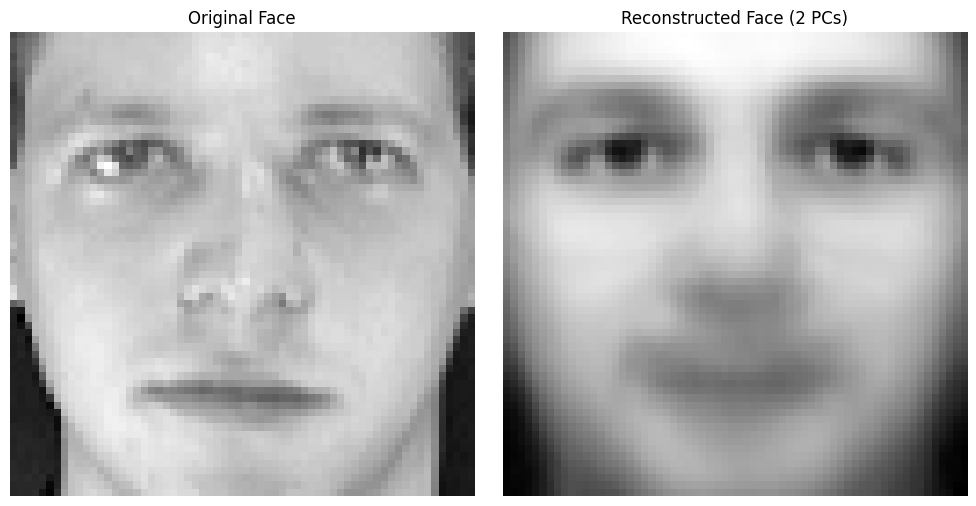

In [24]:
######### Reconstruct first face using the first two PCs (3 pts) #########
######################
#   YOUR CODE HERE   #
######################

top_2_indices = sorted_indices[:2]
top_2_eigenvalues = eigenvalues[top_2_indices] 
top_2_eigenvectors = eigenvectors[:, top_2_indices]

first_face = norm_face[0].reshape(-1)

projection_coeffs = first_face @ top_2_eigenvectors 

reconstructed_face = projection_coeffs @ top_2_eigenvectors.T

reconstructed_face_image = reconstructed_face.reshape(64, 64) + mean_face

original_face_image = first_face.reshape(64, 64) + mean_face

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_face_image, cmap="gray")
axes[0].set_title("Original Face")
axes[0].axis("off")

axes[1].imshow(reconstructed_face_image, cmap="gray")
axes[1].set_title("Reconstructed Face (2 PCs)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


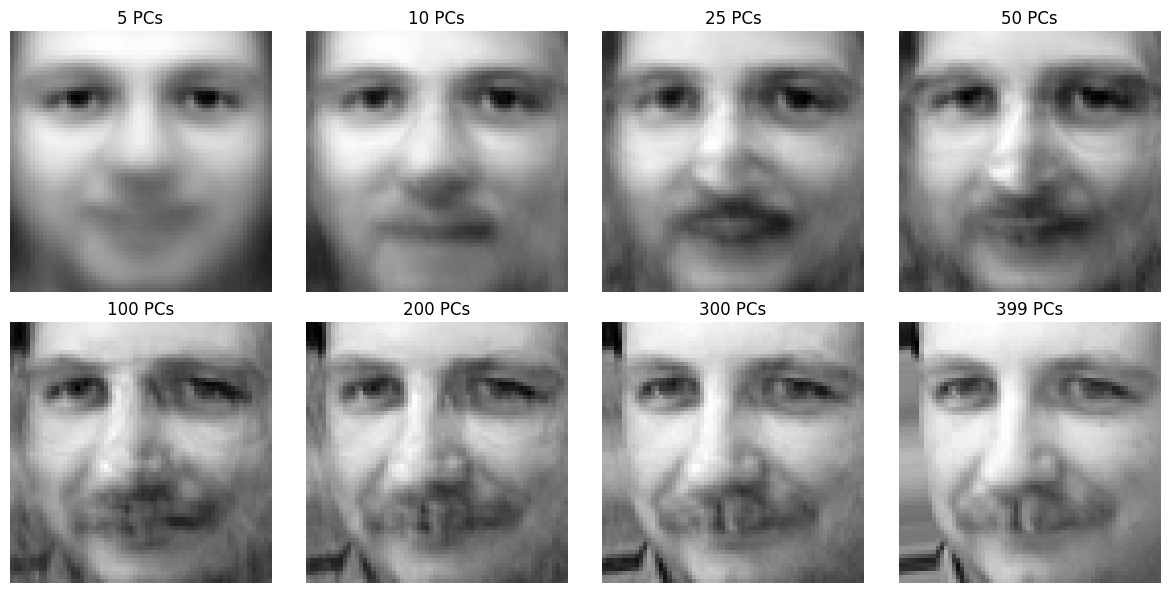

In [58]:
######### Reconstruct random face using the first 5, 10, 25, 50, 100, 200, 300, 399  PCs (3 pts) #########
######################
#   YOUR CODE HERE   #
######################

random_face = norm_face[np.random.randint(0, norm_face.shape[0])]
random_face.shape

pcs_to_use = [5, 10, 25, 50, 100, 200, 300, 399]
reconstructed_images = []

for k in pcs_to_use:
    top_k_indices = sorted_indices[:k]
    top_k_eigenvalues = eigenvalues[top_k_indices] 
    top_k_eigenvectors = eigenvectors[:, top_k_indices]

    projection_coeffs = random_face @ top_k_eigenvectors  
    reconstructed_face = projection_coeffs @ top_k_eigenvectors.T 
    reconstructed_images.append(reconstructed_face)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(reconstructed_images[i].reshape(64, 64) + mean_face, cmap="gray")
    ax.set_title(f"{pcs_to_use[i]} PCs")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
######### Plot proportion of variance of all the PCs (3 pts) #########
######################
#   YOUR CODE HERE   #
######################